<a href="https://colab.research.google.com/github/thessafuzaro/ANN/blob/main/Projeto_Thessa_versao_5_Dados_do_autor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''Primeiro projeto de redes neurais
Aluna: Thessa Fuzaro Mendes
Artigo: On the optimiation of froth flotation by the use of an artificial neural network [Al-Thyabat S]
Data: 26/05/2021'''

'Primeiro projeto de redes neurais\nAluna: Thessa Fuzaro Mendes\nArtigo: On the optimiation of froth flotation by the use of an artificial neural network [Al-Thyabat S]\nData: 26/05/2021'

In [ ]:
#Bibliotecas necessárias
import os
import numpy as np   # biblioteca númerica do python
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import r2_score 

#np.random.seed(0) #utilizado para parar no resultado desejado (não randomizar)

In [ ]:
# para gerar o grafico no browser
%matplotlib inline

In [ ]:
!git clone https://github.com/thessafuzaro/ANN
%cd ANN

Cloning into 'ANN'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 146 (delta 85), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 226.75 KiB | 8.10 MiB/s, done.
Resolving deltas: 100% (85/85), done.
/content/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN


In [ ]:
# leitura dos dados
df=pd.read_csv("Dados_artigo_redes_neurais_atualizados.csv", delimiter=';')   # pelo pandas (pd) lê o arquivo no formato csv - arquivo de dados como o excel
print (df.head)

<bound method NDFrame.head of     No    Range  Mean_size  Collector_dosage  Impeller_speed  Recovery  Grade
0    1    16-32        750              0.90            1100     98.47  65.18
1    2   16-150        553              0.56            1200     92.71  65.36
2    3  150-270         79              0.67            1200     68.51  77.53
3    4   32-270        277              1.12            1200     93.90  52.68
4    5   24-270        380              0.90            1500     82.99  64.29
5    6   32-270        277              0.78            1200     95.69  62.93
6    7    16-24        854              0.90            1200     94.19  76.38
7    8   16-150        553              0.78            1500     66.15  67.67
8    9   24-270        380              1.12            1100     97.68  56.07
9   10   32-270        277              0.67            1200     98.13  60.60
10  11    16-24        854              1.12            1200     97.71  76.91
11  12   16-150        553        

In [ ]:
#Selecionando as colunas de interesse:
Dat_Select=df.iloc[:,2:]

In [ ]:
Dat_Select.head (5)

,Mean_size,Collector_dosage,Impeller_speed,Recovery,Grade
0,750,0.90,1100,98.47,65.18
1,553,0.56,1200,92.71,65.36
2,79,0.67,1200,68.51,77.53
3,277,1.12,1200,93.90,52.68
4,380,0.90,1500,82.99,64.29


In [ ]:
# Separando o s  dados em normatizados e originais:
Index=[0,1,2]
X=Dat_Select.iloc[:,Index].copy()
Y=Dat_Select.iloc[:,3:].copy()

In [ ]:
#separa os dados em treino e teste -> Aqui os dados que eu coloquei no treino e teste foram identicos aos dados usados pelos autores
X_Train=X.iloc[0:5,:]
X_Test=X.iloc[6:,:]
Y_Train=Y.iloc[0:5,:]
Y_Test=Y.iloc[6:,:]

In [ ]:
#X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.20, shuffle=True, random_state=42)

In [ ]:
Scaler_X = preprocessing.MinMaxScaler((0,1)).fit(X)
Scaler_Y= preprocessing.MinMaxScaler((0,1)).fit(Y)

In [ ]:
X_Train = Scaler_X.transform(X_Train)
X_Test = Scaler_X.transform(X_Test)
Y_Train = Scaler_Y.transform(Y_Train)
Y_Test= Scaler_Y.transform(Y_Test)

In [ ]:
#Definindo a Rede Neural 
model = MLPRegressor(solver='lbfgs',activation='logistic',alpha=1e-5,max_iter=2000,
                     hidden_layer_sizes=(9,11),random_state=6)

In [ ]:
#Treinando a Rede Neural
model.fit(X_Train, Y_Train)

MLPRegressor(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(9, 11), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=6, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
# Usando a rede neural treina em calculos para treino e teste
Y_Calc_Train=model.predict(X_Train)
Y_Calc_Test=model.predict(X_Test)

In [ ]:
#Transformando a saida da rede na forma original
Y_Obs_Train=Scaler_Y.inverse_transform(np.array(Y_Train).reshape(-1,2))
Y_Obs_Test=Scaler_Y.inverse_transform(np.array(Y_Test).reshape(-1,2))
Y_Calc_Train=Scaler_Y.inverse_transform(Y_Calc_Train.reshape(-1,2))
Y_Calc_Test=Scaler_Y.inverse_transform(Y_Calc_Test.reshape(-1,2))

In [ ]:
#Separando a resposta Recovery para treino e teste dos dados observados e calculados
Y_Obs_Train_Recovery=Y_Obs_Train[:,0]
Y_Obs_Test_Recovery=Y_Obs_Test[:,0]
Y_Calc_Train_Recovery=Y_Calc_Train[:,0]
Y_Calc_Test_Recovery=Y_Calc_Test[:,0]

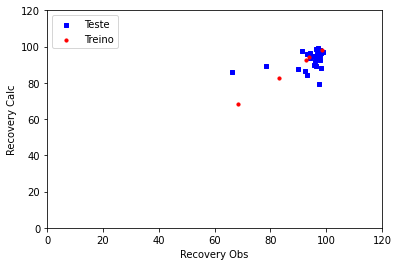

In [ ]:
# Expressando os dois dados em figura para a resposta Recovery
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(Y_Obs_Test_Recovery, Y_Calc_Test_Recovery, s=10, c='b', marker="s", label='Teste')
ax1.scatter(Y_Obs_Train_Recovery, Y_Calc_Train_Recovery, s=10, c='r', marker="o", label='Treino')
plt.legend(loc='upper left')
plt.xlim([0,120])
plt.ylim([0,120])
plt.ylabel('Recovery Calc')
plt.xlabel('Recovery Obs')
plt.show()

In [ ]:
MSE_Test_Recovery=mean_squared_error(Y_Obs_Test_Recovery,Y_Calc_Test_Recovery)
print("MSE Recovery Teste=",MSE_Test_Recovery)
R2_Test_Recovery=r2_score(Y_Obs_Test_Recovery,Y_Calc_Test_Recovery)
print("R^2 Teste=",R2_Test_Recovery)

MSE Recovery Teste= 44.4040319463635
R^2 Teste= -0.030139491138025498


In [ ]:
MSE_Train_Recovery=mean_squared_error(Y_Obs_Train_Recovery,Y_Calc_Train_Recovery)
print("MSE Treino=",MSE_Train_Recovery)
R2_Train_Recovery=r2_score(Y_Obs_Train_Recovery,Y_Calc_Train_Recovery)
print("R^2 Treino=",R2_Train_Recovery)

MSE Treino= 0.037088599997606594
R^2 Treino= 0.999674224704604


In [ ]:
#Separando a resposta Grade para treino e teste dos dados observados e calculados
Y_Obs_Train_Grade=Y_Obs_Train[:,1]
Y_Obs_Test_Grade=Y_Obs_Test[:,1]
Y_Calc_Train_Grade=Y_Calc_Train[:,1]
Y_Calc_Test_Grade=Y_Calc_Test[:,1]

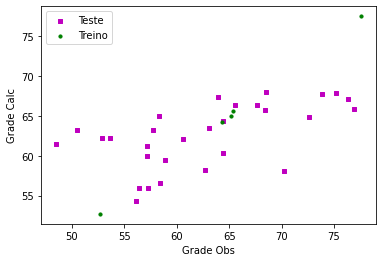

In [ ]:
# Expressando os dois dados em figura (Grade)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(Y_Obs_Test_Grade,Y_Calc_Test_Grade, s=10, c='m', marker="s", label='Teste')
ax1.scatter(Y_Obs_Train_Grade,Y_Calc_Train_Grade, s=10, c='g', marker="o", label='Treino')
plt.legend(loc='upper left')
plt.ylabel('Grade Calc')
plt.xlabel('Grade Obs')
plt.show()

In [ ]:
MSE_Grade_Test=mean_squared_error(Y_Obs_Test_Grade,Y_Calc_Test_Grade)
print("MSE Grade Teste=",MSE_Grade_Test)
R2_Grade_Test=r2_score(Y_Obs_Test_Grade,Y_Calc_Test_Grade)
print("R^2 Grade Teste=",R2_Grade_Test)

MSE Grade Teste= 40.15858047401602
R^2 Grade Teste= 0.3226317752685135


In [ ]:
MSE_Grade_Train=mean_squared_error(Y_Obs_Train_Grade,Y_Calc_Train_Grade)
print("MSE Grade Treino=",MSE_Grade_Train)
R2_Grade_Train=r2_score(Y_Obs_Train_Grade,Y_Calc_Train_Grade)
print("R^2 Grade Treino=",R2_Grade_Train)

MSE Grade Treino= 0.028664338808470663
R^2 Grade Treino= 0.9995368488604253
